# 1. Introduction

In a restaurant, a waiter recorded data on customers he served over a two month period in 1990. The dataset has been used to investigate relationships between certain measures such as tip, bill, size of party and sex of bill payer. In this project, I have analysed the data to answer the following questions:
1. Is there a relationship between the bill and tip given? If so, what is its nature?
2. Are there any other interesting relationships that emerge from the data?

I used the following sources to inform my analysis: 
[These](https://seaborn.pydata.org/introduction.html) [three](https://medium.com/@mukul.mschauhan/data-visualisation-using-seaborn-464b7c0e5122) [sites](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e) gave me some ideas as to what kind of plots might be suitable for the types of analysis I needed to do.
This blog [post](http://rstudio-pubs-static.s3.amazonaws.com/128623_507fbe51532748f29278825fceedab85.html) and this case [study](https://dicook.public.iastate.edu/stat503/05/cs-tips2.pdf) influenced the direction I took with my analysis of the different variables.They convinced me that a relationship between the tip percentage and size of bill/size of party was an avenue worth exploring.





# 2 Descriptive Statistics

I first imported the tips dataset along with some packages I used to analyse it. 

In [27]:
import numpy as np # import numpy package
import matplotlib.pyplot as plt # import pyplot package from matplotlib
import seaborn as sns # import seaborn package
tips = sns.load_dataset("tips") # import tips dataset from seaborn
tips.head(10) # show first 10 rows of tips dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Printing the first 10 rows of the dataset gives a feel for the data involved. We can see that, for each party, we know the total bill, tip given, size of party, day and time of reservation. There is also a column for "sex" and one for "smoker" in the dataset.

Some summary statistics about the dataset are shown below:

In [28]:
tips.describe() # summary statistics of dataset

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We can see that the values for the total bill range from \\$3.07 to \\$50.81 with a mean bill of just under \\$20 and a median bill of just under $18. The values for tips range from \\$1 to \\$10 with an average tip of just under \\$3 and very similar median value. The histogram below gives us a visualisation of the distribution. We can see that the majority of the tips are between \\$2 and \\$4. The mean value for size is about 2.5; the smallest party was 1 and the largest was a party of 6.

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

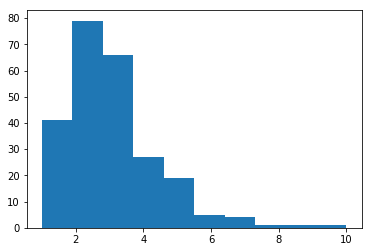

In [35]:
plt.hist(tips["tip"]) # show histogram of "tip" column form dataset

I was interested in the frequency of certain types of parties. I am wary of drawing inferences from data when the sample size is small, as is the case for some groups of data here. 

In [36]:
tips.groupby('size').size() # count the frequency each value occurs in the "size" column. Adapted from https://erikrood.com/Python_References/count_frequency_value_occurs_dataframe_final.html

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

In [37]:
tips.groupby("sex").size()

sex
Male      157
Female     87
dtype: int64

In [38]:
tips.groupby("day").size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [39]:
tips.groupby("time").size()

time
Lunch      68
Dinner    176
dtype: int64

The above code shows that parties of two were by far the most common. Bills in the sample were paid by males twice as much as by females. The majority of the samples were collected at dinner time (176) as opposed to lunch time(68).

# 3. Analysis of Relationship between Bill and Tip

Given that standard practice in US restaurants is to leave a tip of between 15 and 20% of the bill, I would expect there to be a relationship between total bill and tip in the dataset. In this section I will analyse the data to investigate if this is the case.

First I wanted to have a look at the percentage tip given. I surmised that if this value was reasonably consistent around the 15-20% mark, then it was likely that a strong relationoship between bill and tip would emerge. I added a column "percentage_tip" to the dataframe which divided tip by total bill to get a percentage. 

In [ ]:
bill = tips.loc[: , "total_bill"] # return total_bill column from "tips" and assign to variable "bill"
tip = tips.loc[:, "tip"] # return tip column from "tips" and assign to variable "tip"  adapted from https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
tips['percentage_tip'] = tip/bill # add new column to "tips" that divides tip by bill to get percentage tip adapted from https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
tips.head() # show first 5 lines of "tips"

The next piece of code describes the percentage tip column. We can see that the mean value is just over 15% and that half of all tips were between 13% and 19%. 

In [ ]:
tips["percentage_tip"].describe() # summary statistics of  percentage tip column

The histogram of the percentage tip shows that the vast majority of tips were between 10 and 25%

In [ ]:
tips.hist( column =['percentage_tip'],) # show histogram of "percentage tip" column from dataset

Next I created a scatterplot of total bill against tip. We can see what appears to be a linear relationship between the two variables, notwithstanding a few outliers in the bottom right quadrant in particular.

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips); # scatterplot of total bill(x axis) against tip(y axis) from data in tips dataset

The next piece of code obtains a line of best fit and adds it to the scatterplot. 

In [ ]:
import numpy as np # import numpy package
import matplotlib.pyplot as plt # import pyplot package from matplotlib
# the following code adapted from notes in course video on regression 
## https://web.microsoftstream.com/video/021a0f49-a019-4119-a08c-7601a9a7d0b5?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D689
b = tips["total_bill"] # return "total bill" column as array and assign to variable b
t = tips["tip"] # return "tips" column as array and assign to variable t
d = np.polyfit(b,t,1) # use polyfit function to return array containing values m and c to be used in line of best fit. Assign to variable d
m = d[0] # return first value from array "d" and assign to variable m
c = d[1] # return second value from array "d" and assign to variable c
plt.scatter(b, t) # scatterplot of total bill against tips
plt.plot(b,m*b +c) # plot line of best fit using values m and c obtained above

My initial impression on viewing the plot is that there is indeed a correlation between total bill and tip which is linear in nature.

# 4. Analysis of Relationship between Variables

We now investigate if there is a relationship between the total bill and tip percentage using the scatterplot below. 

In [ ]:
sns.relplot(x="total_bill", y="percentage_tip", data=tips); # scatterplot of total bill(x axis) against percentage tip(y axis) from data in tips dataset

It seems as though higher bills tend to have a lower tip percentage but the relationship seems weak. We can try a line of best fit here. 

In [ ]:
p = tips["percentage_tip"] # return "percentage_tips" column as array and assign to variable p
d = np.polyfit(b,p,1) # use polyfit function to return array containing values m and c to be used in line of best fit. Assign to variable d
m = d[0] # return first value from array "d" and assign to variable m
c = d[1] # return second value from array "d" and assign to variable c
plt.scatter(b, p) # scatterplot of total bill against percentage_tips
plt.plot(b,m*b +c) # plot line of best fit using values m and c obtained above

If higher bills tend to result in a lower percentage tip what could be the reason for this? Do people tip less because the bill is more expensive? Or could it be that people tip less when in larger groups? Interestingly, when we look at mean tip percentage by group size, we find that it is decreasing as the group size increases (with the sole exception of groups of 6)

In [ ]:
tips.groupby("size").mean() # disply mean of each column grouped by table size

We try a scatterplot here to look at the relationship and assign a line of best fit.

In [ ]:
s = tips["size"]
d = np.polyfit(s,p,1) # use polyfit function to return array containing values m and c to be used in line of best fit. Assign to variable d
m = d[0] # return first value from array "d" and assign to variable m
c = d[1] # return second value from array "d" and assign to variable c
plt.scatter(s, p) # scatterplot of total bill against percentage_tips
plt.plot(s,m*s +c) # plot line of best fit using values m and c obtained above

In [ ]:
sns.relplot(x="size", y="percentage_tip",hue = "sex", data=tips); # scatterplot of size of group(x axis) against percentage tip(y axis) from data in tips dataset

I became interested in the question "What makes people give the tip that they give?" I wondered whether much of the variation in tip size was to do with convenience. Some people like to tip in round numbers. Some like to pay in round numbers and leave the change as a tip. Some, presumably, like to leave an exact percentage, be it 15 or 20. I decided to do some analysis on how much of tipping is predicated on these round numbers. 

I plotted a histogram of tip size. The spikes on the plot show that many people like to give round numbers as tips. Note the spikes around the whole number values 1-5 particularly.

In [ ]:
sns.distplot(tips['tip'], kde=False, bins=100);


I added a new column, "cash tendered", that adds bill to tip given . I expected this value to be a round number in many cases

In [ ]:
tips['cash_tendered'] = tip + bill # add new column to "tips" that adds tip to bill to get amount paid in by diner adapted from https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
tips.head() # show first 5 lines of "tips"

The following code plots a histogram of cash tendered. As expected, there are spikes around whole number values, in particular 15, 17, 18 and 20

In [ ]:
sns.distplot(tips['cash_tendered'], kde=False, bins=500);
plt.xlim(10,25) # set x axis limits between 10 and 25; adapted from https://python-graph-gallery.com/44-control-axis-limits-of-plot-seaborn/


# 5. Conclusion

In analysing a dataset such as this, there is a danger that an uncritical look at many combinations of variables will throw up some spurious relationships. The analyses I looked at included statements such as "Female smokers are very consistent tippers" and "In parties of size 1, the sex of the bill payer depends on the day of the week". To be fair, the case study that contained these statements stated "There should be no temptation to
make inference from the data, and emphasis should be on poking around the data to formulate hypotheses". It is in this spirit that I chose the analysis that I did. I was looking for relationships that sounded plausible and may reward further exploration. That there is a relationship between bill paid and tip given is unsurprising and is likely to replicate in  other studies. The finding of a relationships between size of bill/party and tip percentage does not seem as robust, but further study of this question would be interesting.

In [ ]:
tips.groupby("day").mean()

# References

## Plotting the data

https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e   
https://grindsquare.co.za/python-data-visualisation-using-seaborn/   
https://data-and-design.readthedocs.io/en/latest/02-introPandas.html   
https://medium.com/@mukul.mschauhan/data-visualisation-using-seaborn-464b7c0e5122   
https://seaborn.pydata.org/tutorial/relational.html

## Analysis of relationships
https://dicook.public.iastate.edu/stat503/05/cs-tips2.pdf  
http://rstudio-pubs-static.s3.amazonaws.com/128623_507fbe51532748f29278825fceedab85.html

## Markdown
https://markdownmonster.west-wind.com/docs/_4xs10gaui.htm (embedding links)  
https://stackoverflow.com/questions/16089089/escaping-dollar-sign-in-ipython-notebook (rendering dollar values)

## General
https://www.aarp.org/money/budgeting-saving/info-11-2012/tipping-guidelines-and-etiquette.html (tipping etiquette)

Sources used for code referenced in code comments.

